In [1]:
# Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **EDA Analysis**
## Ticket 1.1: Data Ingestion & Initial Exploration
### Data Ingestion


In [2]:
# Load the data
job_postings = pd.read_csv('../../../../data/job_postings.csv')
job_skills = pd.read_csv('../../../../data/job_skills.csv')

display("Job Postings Dataset:")
display(job_postings.head())
display("Job Skills Dataset:")
display(job_skills.head())

'Job Postings Dataset:'

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


'Job Skills Dataset:'

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [3]:
# display basic dataset information

display("Job Postings Dataset:")
display(job_postings.info())
display("Job Skills Dataset:")
display(job_skills.info())


'Job Postings Dataset:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             12217 non-null  object
 1   last_processed_time  12217 non-null  object
 2   last_status          12217 non-null  object
 3   got_summary          12217 non-null  object
 4   got_ner              12217 non-null  object
 5   is_being_worked      12217 non-null  object
 6   job_title            12217 non-null  object
 7   company              12217 non-null  object
 8   job_location         12216 non-null  object
 9   first_seen           12217 non-null  object
 10  search_city          12217 non-null  object
 11  search_country       12217 non-null  object
 12  search_position      12217 non-null  object
 13  job_level            12217 non-null  object
 14  job_type             12217 non-null  object
dtypes: object(15)
memory usage: 1.4+ MB


None

'Job Skills Dataset:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_link    12217 non-null  object
 1   job_skills  12212 non-null  object
dtypes: object(2)
memory usage: 191.0+ KB


None

In [4]:
# display basic dataset statistics

display("Job Postings Dataset:")
display(job_postings.describe())
display("Job Skills Dataset:")
display(job_skills.describe())



'Job Postings Dataset:'

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,12217,12217,12217,12217,12217,12217,12217,12217,12216,12217,12217,12217,12217,12217,12217
unique,12217,5763,1,1,1,1,6484,3947,2049,6,801,4,711,2,3
top,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Senior Data Engineer,Jobs for Humanity,"New York, NY",2024-01-13,Greater London,United States,Data Entry Clerk,Mid senior,Onsite
freq,1,6455,12217,12217,12217,12217,285,732,280,4946,189,10291,1088,10919,12188


'Job Skills Dataset:'

,job_link,job_skills
count,12217,12212
unique,12217,12204
top,https://www.linkedin.com/jobs/view/senior-mach...,"VolunteerMatch, LinkedIn for Good"
freq,1,3


### Dataset Career Representation Analysis

In [5]:
# Display the number of unique job titles in the job_postings dataset
unique_job_titles = job_postings['job_title'].nunique()
display(f"Number of unique job titles in the job_postings dataset: {unique_job_titles}")

# Display a l;st of all job titles and the number of occurences in the job_postings dataset
job_title_counts = pd.DataFrame(job_postings['job_title'].value_counts()).reset_index()
display(job_title_counts)

'Number of unique job titles in the job_postings dataset: 6484'

,job_title,count
0,Senior Data Engineer,285
1,Senior Data Analyst,163
2,Data Engineer,149
3,Senior MLOps Engineer,138
4,Data Analyst,137
...,...,...
6479,Medical Scientist/MLT - Cranberry (FT and PT a...,1
6480,IMLS Graduate Fellow in Objects Conservation,1
6481,SCHOOL DATA MANAGER II 2023-2024 EOY,1
6482,Sr Systems Administrator (Data Management),1


'Top 10 Most Common Job Titles:'

,job_title,count
0,Senior Data Engineer,285
1,Senior Data Analyst,163
2,Data Engineer,149
3,Senior MLOps Engineer,138
4,Data Analyst,137
5,Data Scientist,128
6,Lead Data Engineer,123
7,Senior Data Scientist,119
8,Data Architect,111
9,"Staff Machine Learning Engineer, Series A",101


'Bottom 10 Least Common Job Titles:'

,job_title,count
6474,Alternative Data Sales,1
6475,Grants and Data Quality Assurance Manager,1
6476,"Government Representative 2 Data Coordinator,...",1
6477,Research Data Specialist,1
6478,Medical Laboratory Scientist/MLT,1
6479,Medical Scientist/MLT - Cranberry (FT and PT a...,1
6480,IMLS Graduate Fellow in Objects Conservation,1
6481,SCHOOL DATA MANAGER II 2023-2024 EOY,1
6482,Sr Systems Administrator (Data Management),1
6483,"Medical Technologist, MLS or MLT",1


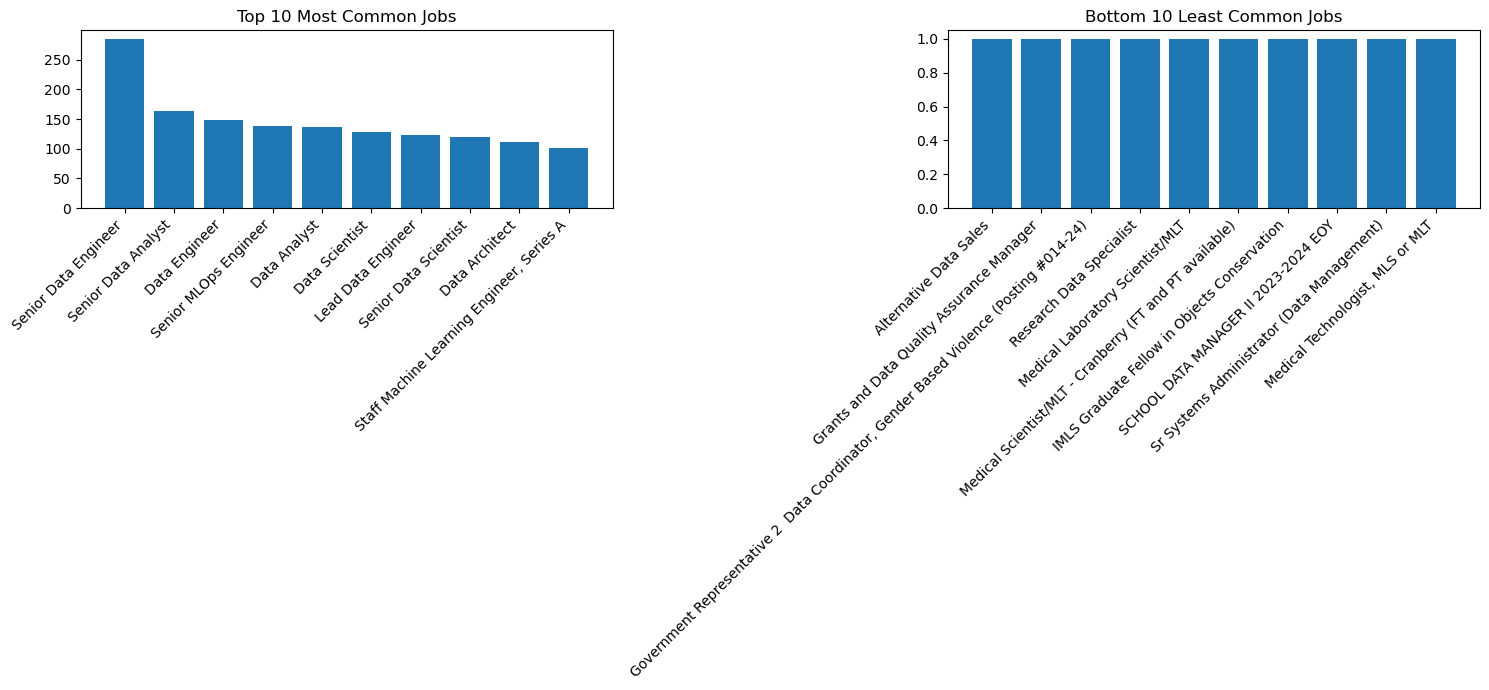

In [6]:
# Visualize the distribution of job titles within most and least common
top_10_jobs = job_title_counts.head(10)
bottom_10_jobs = job_title_counts.tail(10)

display("Top 10 Most Common Job Titles:")
display(top_10_jobs)

display("Bottom 10 Least Common Job Titles:")
display(bottom_10_jobs)

# Create figure
plt.figure(figsize=(15, 7))

# First subplot - Top 10 jobs
plt.subplot(1, 2, 1)
plt.bar(top_10_jobs['job_title'], top_10_jobs['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Common Jobs')

# Second subplot - Bottom 10 jobs
plt.subplot(1, 2, 2)
plt.bar(bottom_10_jobs['job_title'], bottom_10_jobs['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Least Common Jobs')

plt.tight_layout()

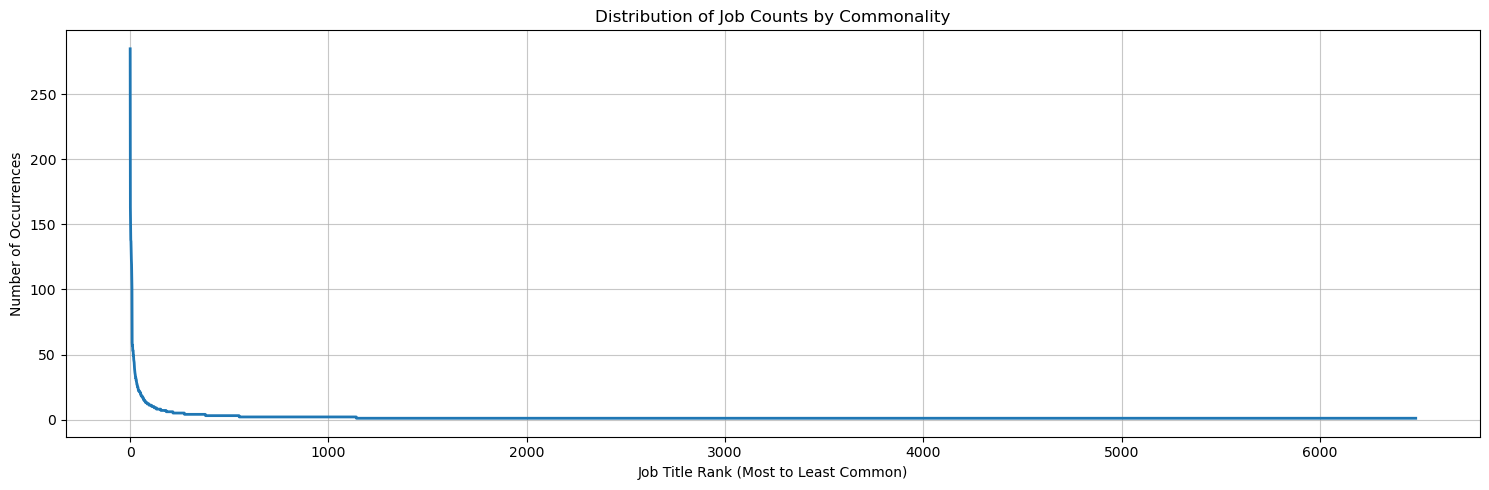

In [7]:
# Create a new figure for the line graph
plt.figure(figsize=(15, 5))

# Create line plot using the full job_title_counts dataframe
plt.plot(range(len(job_title_counts)), job_title_counts['count'], linewidth=2)

# Customize the plot
plt.title('Distribution of Job Counts by Commonality')
plt.xlabel('Job Title Rank (Most to Least Common)')
plt.ylabel('Number of Occurrences')
plt.grid(True, alpha=0.7)

# Add tight layout to prevent label cutoff
plt.tight_layout()

#### **Reflection: Standardizing Job Titles**  

I expected some inconsistencies—abbreviations, varied job names, specializations, and industry-specific connotations—but running the **career representation analysis** revealed just how extreme the uniqueness of certain job titles is. Seeing roles like **"IMLS Graduate Fellow in Objects Conservation"** or **"Medical Scientist/MLT - Cranberry (FT and PT)"** reinforced that a simple rule-based approach might not be enough.  

The **line graph** depicting job count distribution by commonality made this even clearer—**nearly 80% of the job titles appear only once**, meaning most titles are highly descriptive and unique. This raises a key challenge: **How do I generalize meaningfully without oversimplifying the data?**  

From my research, possible approaches include **keyword-based categorization**, **manual review for edge cases**, and even **fuzzy matching**—though I haven’t explored these yet. As I start the **EDA process**, my focus will be understanding the data’s structure before deciding on what the best approach to standardization could be and whether it's viable considering the time constraints.


### Job Skill Data Representation Analysis

In [8]:
# Merge job_postings and job_skills datasets
merged_df = pd.merge(job_postings, job_skills, on='job_link', how='left')

# Display the merged dataset
display(merged_df.head())

# Display basic statistics
display(merged_df.describe())

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
count,12217,12217,12217,12217,12217,12217,12217,12217,12216,12217,12217,12217,12217,12217,12217,12212
unique,12217,5763,1,1,1,1,6484,3947,2049,6,801,4,711,2,3,12204
top,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Senior Data Engineer,Jobs for Humanity,"New York, NY",2024-01-13,Greater London,United States,Data Entry Clerk,Mid senior,Onsite,"VolunteerMatch, LinkedIn for Good"
freq,1,6455,12217,12217,12217,12217,285,732,280,4946,189,10291,1088,10919,12188,3


#### Skill Frequency Analysis

In [9]:
# Drop skill dataset rows with null values
job_skills_clean = job_skills.dropna(subset=['job_skills'])

# Split job_skills into individual skills
job_skills_clean['job_skills'] = job_skills_clean['job_skills'].str.split(',')

# explode the list into separate rows
job_skills_clean = job_skills_clean.explode('job_skills')

# Create a new dataframe with lowercased stripped skills
job_skills_list = pd.DataFrame({
    'job_link': job_skills_clean['job_link'],
    'skill_name': job_skills_clean['job_skills']
}).reset_index(drop=True)

display(job_skills_list)


/var/folders/pt/863lyd297bx33mrhwt8gcp0h0000gn/T/ipykernel_49532/2346587964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_skills_clean['job_skills'] = job_skills_clean['job_skills'].str.split(',')


,job_link,skill_name
0,https://www.linkedin.com/jobs/view/senior-mach...,Machine Learning
1,https://www.linkedin.com/jobs/view/senior-mach...,Programming
2,https://www.linkedin.com/jobs/view/senior-mach...,Python
3,https://www.linkedin.com/jobs/view/senior-mach...,Scala
4,https://www.linkedin.com/jobs/view/senior-mach...,Java
...,...,...
314945,https://www.linkedin.com/jobs/view/medical-tec...,Graduation from Accredited MT/MLS Program
314946,https://www.linkedin.com/jobs/view/medical-tec...,National Exam Passing
314947,https://www.linkedin.com/jobs/view/medical-tec...,Board of Registry
314948,https://www.linkedin.com/jobs/view/medical-tec...,American Society for Clinical Pathology


'Top 10 Skills:'

,skill_name,count
0,Python,4430
1,SQL,4271
2,Communication,2493
3,Tableau,1653
4,AWS,1631
5,Data Visualization,1536
6,R,1530
7,Data Analysis,1495
8,Machine Learning,1412
9,Spark,1379


'Bottom 10 Skills:'

,skill_name,count
76747,Complex Information Systems,1
76748,National Science,1
76749,CLevel Executive Partnering,1
76750,Regulatory & Basel Reporting Requirements,1
76751,Metrics for Senior Management,1
76752,Senior Management Ready Materials,1
76753,Risk/Technology/Data Management,1
76754,Scrum Teams,1
76755,Testing and Review Support,1
76756,Microbiology Experience,1


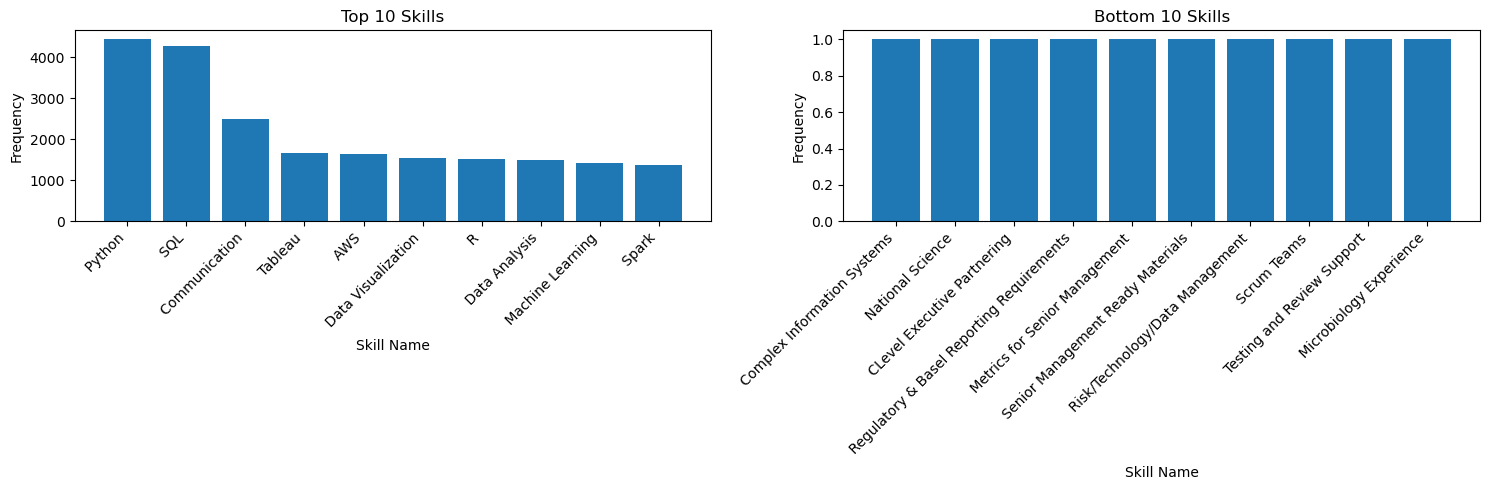

In [10]:
# Create a new dataframe with the frequency of each skill
skill_frequency = job_skills_list['skill_name'].value_counts().reset_index()

# display the top 10 skills
display("Top 10 Skills:")
display(skill_frequency.head(10))

# display the bottom 10 skills
display("Bottom 10 Skills:")
display(skill_frequency.tail(10))

# Create a bar chart of the top 10 and bottom 10 skills
plt.figure(figsize=(15, 5))

# Top 10 skills
plt.subplot(1, 2, 1)
plt.bar(skill_frequency['skill_name'].head(10), skill_frequency['count'].head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Skills')
plt.xlabel('Skill Name')
plt.ylabel('Frequency')

# Bottom 10 skills
plt.subplot(1, 2, 2)
plt.bar(skill_frequency['skill_name'].tail(10), skill_frequency['count'].tail(10))
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Skills')
plt.xlabel('Skill Name')
plt.ylabel('Frequency')

plt.tight_layout()

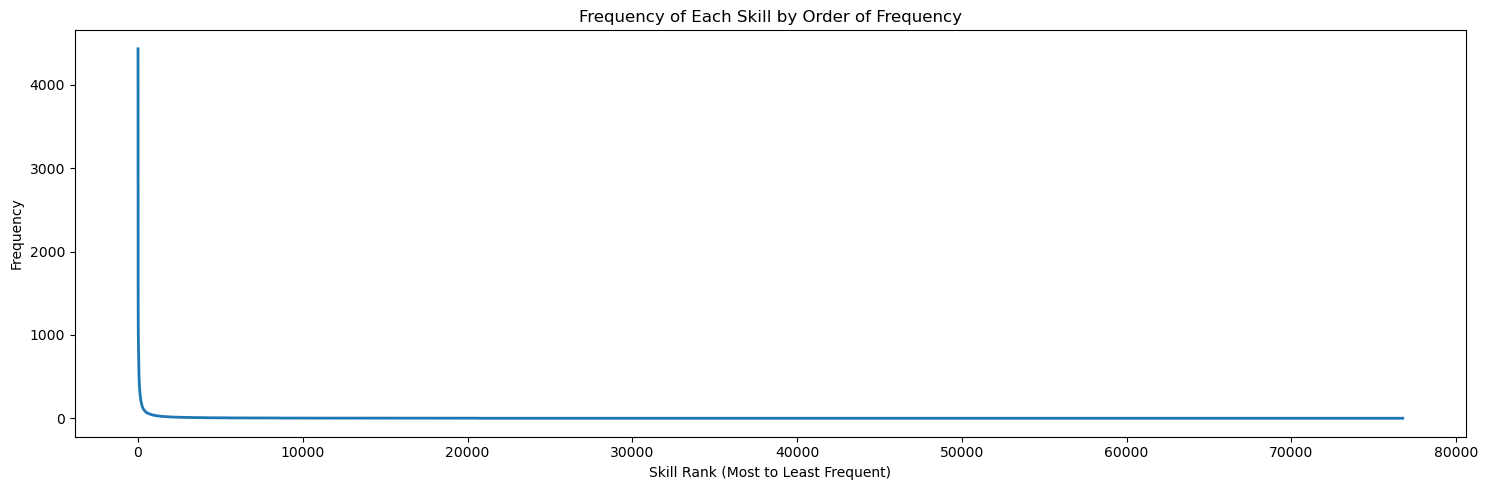

In [11]:
# create a line graph of the frequency of each skill by order of frequency
plt.figure(figsize=(15, 5))

# plot the full line
plt.plot(skill_frequency['count'], linewidth=2)

# label the plot
plt.title('Frequency of Each Skill by Order of Frequency')
plt.xlabel('Skill Rank (Most to Least Frequent)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

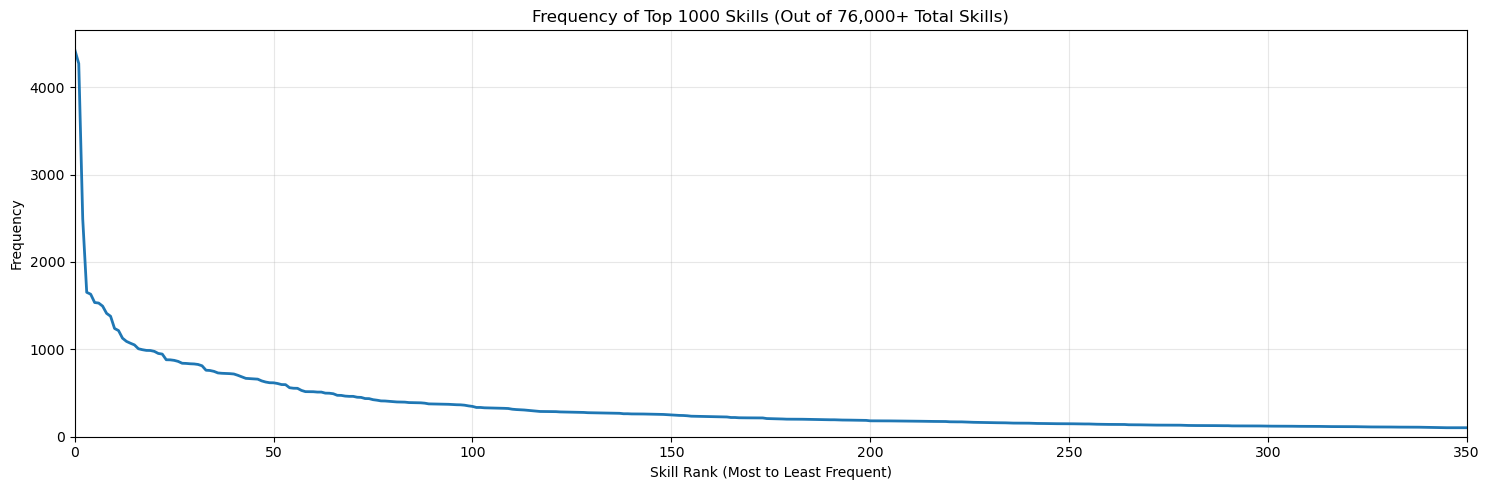

In [12]:
# create a line graph of the frequency of each skill by order of frequency between id 1 and 1000
plt.figure(figsize=(15, 5))

# Plot the full line
plt.plot(skill_frequency['count'], linewidth=2)

# Set the axis limits to zoom into first 1000 skills
plt.xlim(0, 350)
plt.ylim(0, None)  # from 0 to max value within the visible range

# label the plot
plt.title('Frequency of Top 1000 Skills (Out of 76,000+ Total Skills)')
plt.xlabel('Skill Rank (Most to Least Frequent)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

### **Reflection: Analyzing Skill Count Frequencies**  

Looking at the skill count distribution, I noticed a pattern/ issue similar to the one we found with the job titles; **a small set of widely recognized standardized skills dominate the dataset, while the majority appear only once or a few times due to unique naming conventions or industry-specific terminology**.  

The **top 10 skills** (e.g., **Python, SQL, Communication**) appear thousands of times, but the drop-off is steep. By the **250th–350th skill**, occurrences are already around **100**, and by the **2000th skill**, they fall near **20**. By the **10,000th skill**, each entry only has about **three** entries, with nearly **80,000 unique skills** in total. Though we could choose to only consider the skills that appear a certain number of times, this would still leave us with a large number of unique skills to consider with highly varying naming conventions.

This presents a major challenge: **How do I group skills meaningfully without losing valuable distinctions? or How do I limit the operational complexity of the dashboard without sacrificing the ability to provide value to the user?**  

From my research, options like **keyword-based grouping**, **hierarchical categorization**, or even **clustering similar skills** could help, but I haven’t explored them enough yet. As I continue the **EDA process**, I need to determine how to balance **data granularity and usability** when handling such extreme variance.


## **OVERALL REFLECTION: Limiting Scope for a Realistic MVP**  

Upon analyzing the job title and skill distribution datasets, it’s clear that the **data cleaning and standardization of the full dataset is unrealistic**. The extreme uniqueness of job titles (~80% appearing only once) coupled with the fragmentation of skills makes standardization a major challenge which would require the use of fuzzy matching and keyword-based grouping at the minimum and ML models or NLP models for the more complex cases -all of which are currently beyond my skill level and time constraints.

To build a functional MVP, **limiting the scope of the project is necessary** options include:  

1. **Strict Job Title Reduction (Option A)** → Focus only on the **top 10–20 most common job roles**, which **removes most job title cleaning and significantly reduces skill processing complexity**. This approach ensures we only process skills relevant to those jobs, making the MVP manageable.  

2. **Keyword-Based Grouping for Job Titles (Option B)** → Instead of eliminating job titles, we can **merge specialized or niche job titles into broader categories** (e.g., *“Senior Data Engineer” → “Data Engineer”* or *“Medical Scientist/MLT - Cranberry” and “Medical Technologist, MLS or MLT” → “Medical Data Scientist”*). This retains more job roles while preventing fragmentation.  

3. **Statistical Filtering of Niche Jobs & Skills (Option C)** → Use **frequency thresholds** to **remove extreme outliers**, both for job titles and skills, ensuring the dataset is clean and focused.  

The goal is to **build a career skill analyzer that efficiently maps skills to job roles** while keeping the workload feasible. By choosing the right constraints, we ensure stakeholders receive a **usable product without unnecessary complexity**.  